# Ratings Prediction Project

#### Problem Statement

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_rp = pd.read_csv("Ratings_Prediction.csv")
df_rp

,Unnamed: 0,Review_Title,Review_Text,Ratings
0,0,Brilliant,This is a stunning laptop for its price. Fully...,5
1,1,Perfect product!,Its been a month of usage and the product seem...,5
2,2,Excellent,1st impression is awesome.But yet to start on ...,5
3,3,Delightful,Copying data and extracting large files taking...,4
4,4,Waste of money!,Its very slow while copying files or Photos fr...,1
...,...,...,...,...
21656,21656,A DECENT ONE,Overall a DECENT ONE<br>Best thing is their BA...,4.0 out of 5 stars
21657,21657,Nice one for 1 year now getting issue,Good product at this price. Edit on Sep 2020: ...,4.0 out of 5 stars
21658,21658,A fine earphones for everyday use,I have using this earphones for a while now. T...,4.0 out of 5 stars
21659,21659,Good performance,I always liked JBL products. This is the 7th t...,4.0 out of 5 stars


I have imported the collected data which was in csv format and stored it as a dataframe. We can see the first 5 and last 5 observations of the dataset and it looks good also we have all string valued columns. 

In this particular dataset we have about `21661 rows and 3 columns`.

`Unnamed: 0` is the index column of csv file so let's drop that column. Since Ratings is my target column and it is a categorical column with 5 categories so this problem is a `Multi Classification Problem`.

### **Feature Information**: 

**Review_Title** : Title of the Review.  
**Review_Text** : Text Content of the Review.  
**Ratings** : Ratings out of 5 stars.

In [3]:
# First 10 rows
df_rp.head(10)

,Unnamed: 0,Review_Title,Review_Text,Ratings
0,0,Brilliant,This is a stunning laptop for its price. Fully...,5
1,1,Perfect product!,Its been a month of usage and the product seem...,5
2,2,Excellent,1st impression is awesome.But yet to start on ...,5
3,3,Delightful,Copying data and extracting large files taking...,4
4,4,Waste of money!,Its very slow while copying files or Photos fr...,1
5,5,Very Good,performance is pretty great. little turn off o...,4
6,6,Best in the market!,Good,5
7,7,Wonderful,"Good condition, good working, overall good",4
8,8,Waste of money!,screen bleeding issue in the laptop. do not bu...,1
9,9,Super!,This is a good laptop and it's charging speed ...,5


In [4]:
# Last 10 rows
df_rp.tail(10)

,Unnamed: 0,Review_Title,Review_Text,Ratings
21651,21651,Go for it now!,Bass is little low but it's ok. In 479 rupees ...,4.0 out of 5 stars
21652,21652,One side stopped working in 2 months,I hoped that at least this time Earphones woul...,4.0 out of 5 stars
21653,21653,Decent value for money,Used it for a month daily. Volume and stereo a...,4.0 out of 5 stars
21654,21654,Quality,"Works very ok but then, one side doesn't work....",4.0 out of 5 stars
21655,21655,A decent earphone for the price and budget,The sound quality is good. JBL's cheapest earp...,4.0 out of 5 stars
21656,21656,A DECENT ONE,Overall a DECENT ONE<br>Best thing is their BA...,4.0 out of 5 stars
21657,21657,Nice one for 1 year now getting issue,Good product at this price. Edit on Sep 2020: ...,4.0 out of 5 stars
21658,21658,A fine earphones for everyday use,I have using this earphones for a while now. T...,4.0 out of 5 stars
21659,21659,Good performance,I always liked JBL products. This is the 7th t...,4.0 out of 5 stars
21660,21660,NaN,NaN,NaN


In [5]:
# Sample
df_rp.sample(4)

,Unnamed: 0,Review_Title,Review_Text,Ratings
15081,15081,Loud and clear sound,Writing after 4 days usage and here's what i f...,4.0 out of 5 stars
12388,12388,Worth every penny,Very nice picture good mobile,5
13776,13776,Does the job,Camera super💞\nBattery low💔,3
8048,8048,Excellent,Best price best quality good service,5


# Exploratory Data Analysis [EDA]

Since Unnamed: 0 is the index column of csv file so let's drop that column as it will not help us in our predictions.

In [6]:
# Dropping unnecessary column
df_rp.drop(columns = 'Unnamed: 0',inplace = True)

In [7]:
# Checking shape of my dataset
df_rp.shape

(21661, 3)

There are `21661 rows and 3 columns` in the dataset.

In [8]:
# Checking all column names
df_rp.columns

Index(['Review_Title', 'Review_Text', 'Ratings'], dtype='object')

In [9]:
# Checking the info about the dataset
df_rp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21661 entries, 0 to 21660
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  20427 non-null  object
 1   Review_Text   20516 non-null  object
 2   Ratings       20427 non-null  object
dtypes: object(3)
memory usage: 507.8+ KB


By observing the info we can say that there are some null values in the dataset and all the columns are of object data type which means all the entries are string entries.

In [10]:
# Checking null values in the dataset
df_rp.isnull().sum()

Review_Title    1234
Review_Text     1145
Ratings         1234
dtype: int64

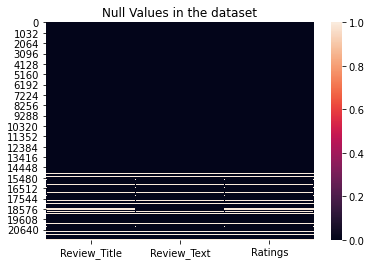

In [11]:
# Visualizing null values in the dataset
sns.heatmap(df_rp.isnull())
plt.title("Null Values in the dataset")
plt.show()

We have a huge number of nan values in the dataset. Let's replace them using imputation methods.

# Replacing NaN values using imputation methods

In [12]:
# Checking the mode of Review_Title column
df_rp["Review_Title"].mode()

0    Wonderful
dtype: object

The highest occuring Review_Title is Wonderful, we have to replace the nan values in Review_Title column with it's mode.

In [13]:
# Checking the mode of Review_Text column
df_rp["Review_Text"].mode()

0    Good
dtype: object

The highest occuring Review_Text is Good, we have to replace the nan values in Review_Text column with it's mode.

In [14]:
# Checking the value counts of Ratings column
df_rp.Ratings.value_counts()

5                     8459
4                     3076
1                     1771
5.0 out of 5 stars    1284
4.0 out of 5 stars    1181
1.0 out of 5 stars    1176
3.0 out of 5 stars    1111
2.0 out of 5 stars    1077
3                      956
2                      336
Name: Ratings, dtype: int64

Since the highest count in Ratings column is 5, followed by 5.0 out of 5 stars and they both are same, so it is clear the mode for Ratings column is 5.

In [15]:
# Checking the mode of Ratings column
df_rp["Ratings"].mode()

0    5
dtype: object

In [16]:
# Replacing nan values with there mode as all the columns are categorical.
df_rp["Review_Title"] = df_rp["Review_Title"].fillna(df_rp["Review_Title"].mode()[0])
df_rp["Review_Text"] = df_rp["Review_Text"].fillna(df_rp["Review_Text"].mode()[0])
df_rp["Ratings"] = df_rp["Ratings"].fillna(df_rp["Ratings"].mode()[0])

In [17]:
# Checking null values in the dataset again
df_rp.isnull().sum()

Review_Title    0
Review_Text     0
Ratings         0
dtype: int64

We have sucessfully replaced all the nan values using imputation method.

**Now lets make some changes to our target column to make it easier for model building.**

In [18]:
# Checking the unique value count of target column
df_rp['Ratings'].unique()

array(['5', '4', '1', '2', '3', '2.0 out of 5 stars',
       '3.0 out of 5 stars', '1.0 out of 5 stars', '5.0 out of 5 stars',
       '4.0 out of 5 stars'], dtype=object)

Looking the above entries in target column, we need to replace the string entries to there respective values. And lastly, change the column type to integer.

In [19]:
# Replacing the string entries in target column
df_rp['Ratings'] = df_rp['Ratings'].replace('1.0 out of 5 stars',1)
df_rp['Ratings'] = df_rp['Ratings'].replace('2.0 out of 5 stars',2)
df_rp['Ratings'] = df_rp['Ratings'].replace('3.0 out of 5 stars',3)
df_rp['Ratings'] = df_rp['Ratings'].replace('4.0 out of 5 stars',4)
df_rp['Ratings'] = df_rp['Ratings'].replace('5.0 out of 5 stars',5)

In [20]:
# Changing the column data type
df_rp['Ratings'] = df_rp['Ratings'].astype('int')

In [21]:
# Checking the unique value count of target column again
df_rp['Ratings'].unique()

array([5, 4, 1, 2, 3])

**Now lets combine Review_Title and Review_Text to make a single column `Review`.**

In [22]:
# Combining Review text and title
df_rp['Review'] = df_rp['Review_Title'].map(str)+' '+df_rp['Review_Text']

In [23]:
# let's have a look into our dataset
df_rp

,Review_Title,Review_Text,Ratings,Review
0,Brilliant,This is a stunning laptop for its price. Fully...,5,Brilliant This is a stunning laptop for its pr...
1,Perfect product!,Its been a month of usage and the product seem...,5,Perfect product! Its been a month of usage and...
2,Excellent,1st impression is awesome.But yet to start on ...,5,Excellent 1st impression is awesome.But yet to...
3,Delightful,Copying data and extracting large files taking...,4,Delightful Copying data and extracting large f...
4,Waste of money!,Its very slow while copying files or Photos fr...,1,Waste of money! Its very slow while copying fi...
...,...,...,...,...
21656,A DECENT ONE,Overall a DECENT ONE<br>Best thing is their BA...,4,A DECENT ONE Overall a DECENT ONE<br>Best thin...
21657,Nice one for 1 year now getting issue,Good product at this price. Edit on Sep 2020: ...,4,Nice one for 1 year now getting issue Good pro...
21658,A fine earphones for everyday use,I have using this earphones for a while now. T...,4,A fine earphones for everyday use I have using...
21659,Good performance,I always liked JBL products. This is the 7th t...,4,Good performance I always liked JBL products. ...


Since we have obtained Review from Review_Title and Review_Text let's drop Review_Title & Review_Text.

In [24]:
# Dropping unnecessary columns
df_rp.drop(columns = 'Review_Title',inplace = True)
df_rp.drop(columns = 'Review_Text',inplace = True)

In [25]:
# Checking data of first row in Review column
df_rp['Review'][0]

'Brilliant This is a stunning laptop for its price. Fully loaded with 11th gen core i5, 16 GB RAM, 512 GB SSD, front facing speakers with Dolby Audio, metallic body and a good screen, fingerprint sensor, 65W charger etc. No other 16GB RAM laptop is available at this price range Very happy with 1 week of usage so far. just go for it.'

In [26]:
# Checking data of second row in Review column
df_rp['Review'][1]

'Perfect product! Its been a month of usage and the product seems to be amazing. Superfast in all aspects with the ssd in place. I use it mostly for coding and vs code with all its extensions loads lightning fast. And windows 11 looks cool. Overall stunning laptop at this price'

By observing the Reviews we can say that there are many words, numbers, as well as punctuations which are not important for our predictions. So we need to do some text processing.

# Text Processing

In [27]:
# Importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

In [28]:
# Here I am defining a function to replace some of the contracted words to their full form and removing urls 
# and unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [29]:
# Changing all words to there Lowercase
df_rp['Review'] = df_rp['Review'].apply(lambda x : x.lower())

df_rp['Review'] = df_rp['Review'].apply(lambda x : decontracted(x))

In [30]:
# Removing punctuations
df_rp['Review'] = df_rp['Review'].str.replace('[^\w\s]','')
df_rp['Review'] = df_rp['Review'].str.replace('\n',' ')

In [31]:
# Checking data of first row in Review column again
df_rp['Review'][0]

'brilliant this is a stunning laptop for its price fully loaded with 11th gen core i5 16 gb ram 512 gb ssd front facing speakers with dolby audio metallic body and a good screen fingerprint sensor 65w charger etc no other 16gb ram laptop is available at this price range very happy with 1 week of usage so far just go for it'

In [32]:
# Checking data of second row in Review column again
df_rp['Review'][1]

'perfect product its been a month of usage and the product seems to be amazing superfast in all aspects with the ssd in place i use it mostly for coding and vs code with all its extensions loads lightning fast and windows 11 looks cool overall stunning laptop at this price'

Now the data looks far better than previous.And we have successfully removed punctuations and unwanted text from our text and lowercased all the text data.

# Removing Stop Words

In [33]:
# Removing stop words
stop = stopwords.words('english')
df_rp['Review'] = df_rp['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [34]:
# Checking the text data again
df_rp['Review'][0]

'brilliant stunning laptop price fully loaded 11th gen core i5 16 gb ram 512 gb ssd front facing speakers dolby audio metallic body good screen fingerprint sensor 65w charger etc 16gb ram laptop available price range happy 1 week usage far go'

In [35]:
# Checking the text data again
df_rp['Review'][1]

'perfect product month usage product seems amazing superfast aspects ssd place use mostly coding vs code extensions loads lightning fast windows 11 looks cool overall stunning laptop price'

Now we have removed all stop words from the text data.

# Lemmatization

In [36]:
# Initialising lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

In [37]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [38]:
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # Tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # Tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [39]:
df_rp['Review'] = df_rp['Review'].apply(lambda x : lemmatize_sentence(x))

In [40]:
# Checking the text data again
df_rp['Review'][0]

'brilliant stun laptop price fully load 11th gen core i5 16 gb ram 512 gb ssd front face speaker dolby audio metallic body good screen fingerprint sensor 65w charger etc 16gb ram laptop available price range happy 1 week usage far go'

In [41]:
# Checking the text data again
df_rp['Review'][1]

'perfect product month usage product seem amazing superfast aspect ssd place use mostly cod v code extension load lightning fast windows 11 look cool overall stunning laptop price'

So now we have removed the inflectional endings and left out with the base or dictionary form of a word.

# Text Normalization - Standardization

In [42]:
# Noise removal
def scrub_words(text):
    # Remove html markup
    text = re.sub("(<.*?>)", "", text)
    # Remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # Remove white space
    text = text.strip()
    return text

I have defined a function scrub_words for removing the noise from the text. It will remove any html markups, digits and white spaces from the text.

In [43]:
df_rp['Review'] = df_rp['Review'].apply(lambda x : scrub_words(x))

In [44]:
# Checking the text data again
df_rp['Review'][0]

'brilliant stun laptop price fully load th gen core i  gb ram  gb ssd front face speaker dolby audio metallic body good screen fingerprint sensor w charger etc gb ram laptop available price range happy  week usage far go'

In [45]:
# Checking the text data again
df_rp['Review'][1]

'perfect product month usage product seem amazing superfast aspect ssd place use mostly cod v code extension load lightning fast windows  look cool overall stunning laptop price'

Now we have done all the text-processing steps and got required input for our model.

# Data Visualization

### i) Word Counts:

In [46]:
# Creating column for word counts in the text
df_rp['Review_WordCount'] = df_rp['Review'].apply(lambda x: len(str(x).split(' ')))
df_rp[['Review_WordCount','Review']].head()

,Review_WordCount,Review
0,42,brilliant stun laptop price fully load th gen ...
1,28,perfect product month usage product seem amazi...
2,23,excellent st impression awesomebut yet start h...
3,11,delightful copy data extract large file take t...
4,20,waste money slow copying file photos mobile la...


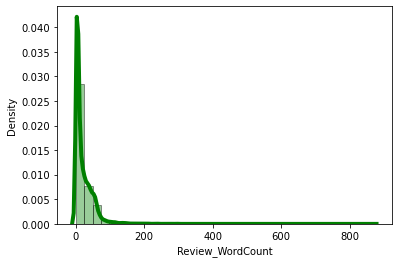

In [47]:
# Density plot and Histogram of Review Word Count
sns.distplot(df_rp['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'g',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

By observing the histogram we can clearly see that most of our text is having a word count in the range of 0 to 200. But some of the reviews are too lengthy which may act like outliers in our data.

### ii) Character Counts:

In [48]:
# Creating column for character counts in the text
df_rp['Review_CharCount'] = df_rp['Review'].str.len()
df_rp[['Review_CharCount','Review']].head()

,Review_CharCount,Review
0,219,brilliant stun laptop price fully load th gen ...
1,176,perfect product month usage product seem amazi...
2,149,excellent st impression awesomebut yet start h...
3,69,delightful copy data extract large file take t...
4,107,waste money slow copying file photos mobile la...


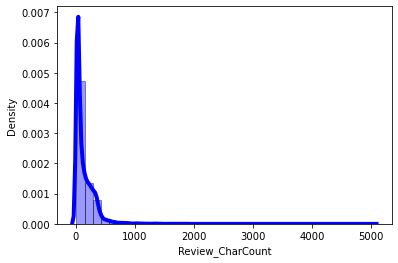

In [49]:
# Density plot and Histogram of all Character Counts
sns.distplot(df_rp['Review_CharCount'], hist = True, kde = True,
            bins = int(180/5), color = 'blue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

The above plot represents histogram for character counts of Review text, which is quite similar to the histogram of word count. Most of the characters are between 0 - 1000.

### Removing Outliers

Some of the reviews are too lengthy, so we have to treat them as outliers and remove them using z_score method.

In [50]:
# Checking the shape of the dataset
df_rp.shape

(21661, 4)

In [51]:
from scipy import stats
from scipy.stats import zscore

z_score = zscore(df_rp[['Review_WordCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df_rp = df_rp[filtering_entry]
df_rp.shape

(21313, 4)

In [52]:
Data_loss=((21661-21313)/21661)*100
Data_loss

1.6065740270532294

The data loss after removing outliers is 1.60 %, which is in acceptable range.

### Plotting histograms for word counts and character counts again after removing outliers

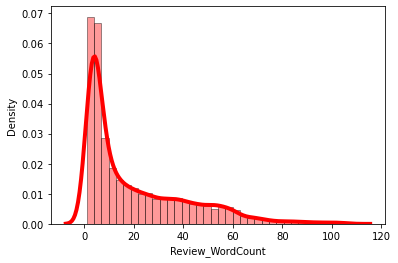

In [53]:
# Density plot and Histogram of Review Word Count
sns.distplot(df_rp['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'r',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

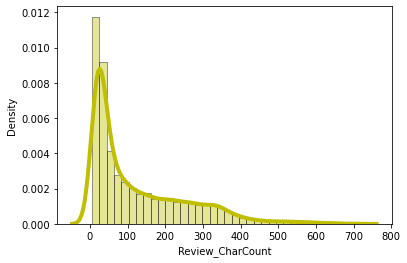

In [54]:
# Density plot and Histogram of all Character Counts
sns.distplot(df_rp['Review_CharCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

After plotting histograms for word counts and character counts and after removing outliers we can see we are left out with good range of number of words and characters.

### iii) Top 25 most frequently occuring words:

In [55]:
# Function to plot most frequent terms
def freq_words(x, terms = 25):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # Selecting top 25 most frequent words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (16,8))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

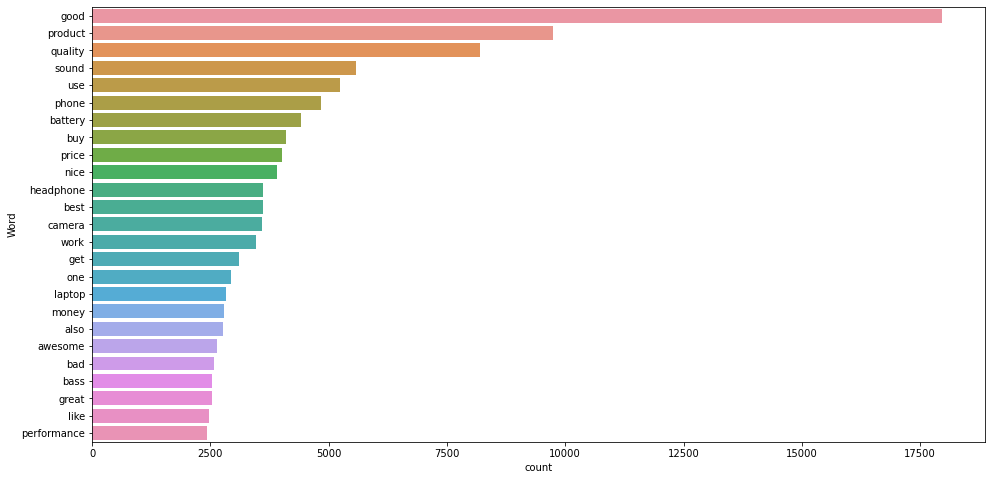

In [56]:
freq_words(df_rp['Review'])

Above list of words have a frequent occurence. Mainly, good, product & quality.

### iv) Top 25 rarely occuring words:

In [57]:
# Function to plot least frequent terms
def rare_words(x, terms = 25):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # Selecting top 25 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (16,8))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

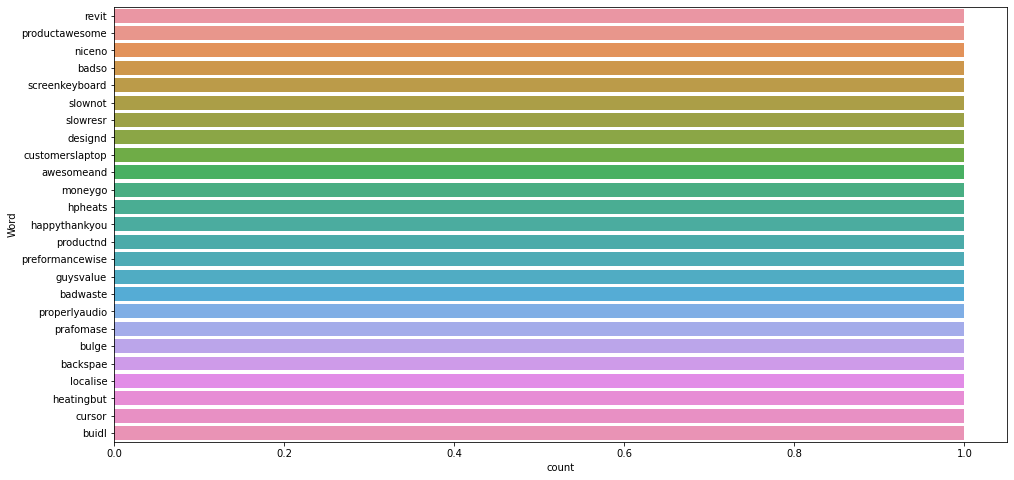

In [58]:
rare_words(df_rp['Review'])

Above list of words have rare occurance in Review.

### v) Word cloud:

In [59]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [60]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

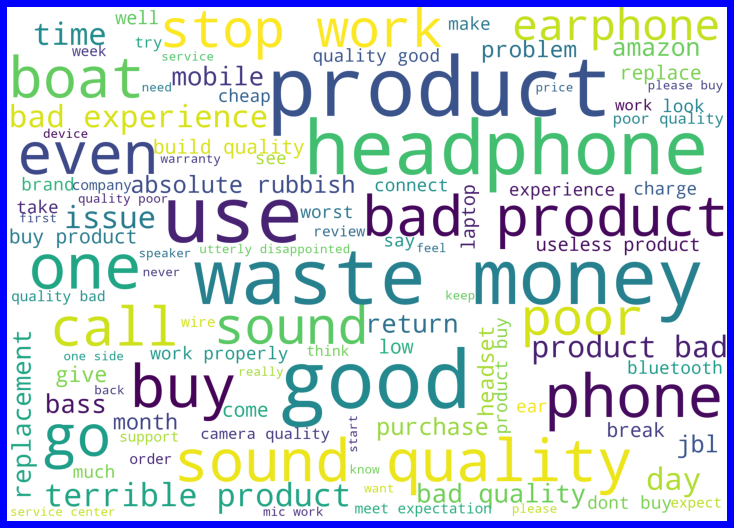

In [61]:
# Plot the loud words with Rating 1
from wordcloud import WordCloud

df_r1=df_rp['Review'][df_rp['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df_r1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

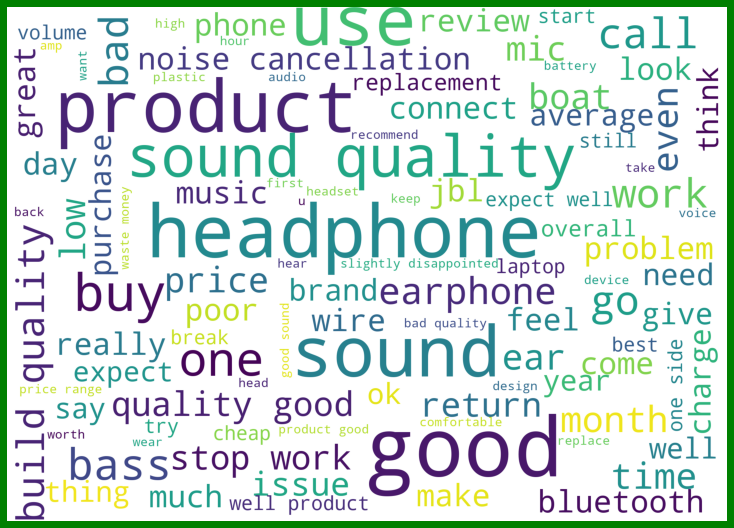

In [62]:
# Plot the loud words with Rating 2
from wordcloud import WordCloud

df_r2=df_rp['Review'][df_rp['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df_r2))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

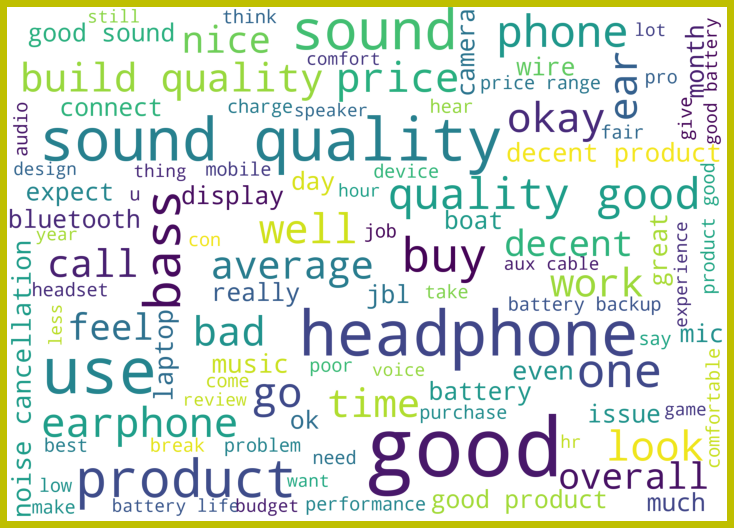

In [63]:
# Plot the loud words with Rating 3
from wordcloud import WordCloud

df_r3=df_rp['Review'][df_rp['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df_r3))

plt.figure(figsize=(10,8),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

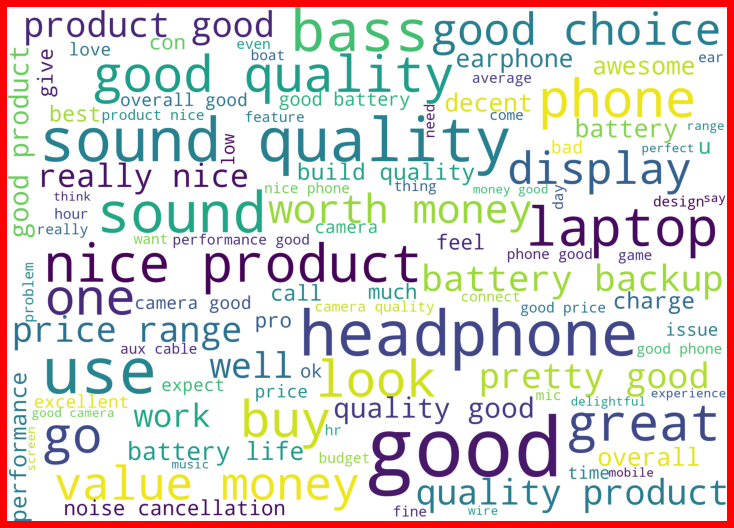

In [64]:
# Plot the loud words with Rating 4
from wordcloud import WordCloud

df_r4=df_rp['Review'][df_rp['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df_r4))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

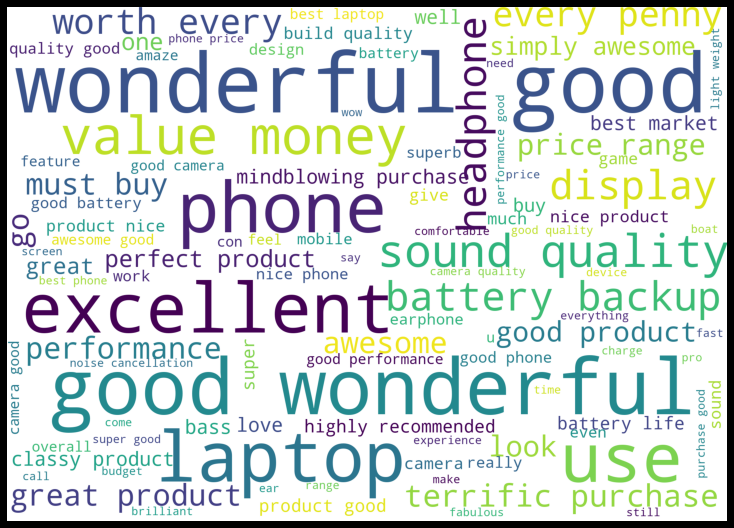

In [65]:
# Plot the loud words with Rating 5
from wordcloud import WordCloud

df_r5=df_rp['Review'][df_rp['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df_r5))

plt.figure(figsize=(10,8),facecolor='black')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

From the above plots we can clearly see the words which are indication of Reviewer's opinion on products.  

The most frequent words used for each Rating is displayed in the word cloud.

In [66]:
# Checking the value counts of Ratings column
df_rp.Ratings.value_counts()

5    10852
4     4147
1     2908
3     2024
2     1382
Name: Ratings, dtype: int64

# Model Building

In [67]:
# Separating feature and target
x = df_rp['Review']
y = df_rp['Ratings']

### Converting text data into vectors using Tfidf Vectorizer

In [68]:
# Using the n_gram tfidf vectorizer(Word vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 17000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [69]:
# Character vectorizer
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 8000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [70]:
# Combining both word vectors and character vectors as input for our model
from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])

In [71]:
# Splitting train and test data
from sklearn.model_selection import train_test_split
seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

In [72]:
x_train.shape

(15984, 25000)

In [73]:
x_test.shape

(5329, 25000)

In [74]:
y_train.shape

(15984,)

In [75]:
y_test.shape

(5329,)

# SMOTE

Now let's do oversampling in order to make data balanced.

In [76]:
# Checking the value counts of Ratings column
y.value_counts()

5    10852
4     4147
1     2908
3     2024
2     1382
Name: Ratings, dtype: int64

In [77]:
# Checking the number of classes before fit
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 8123, 4: 3121, 1: 2194, 3: 1539, 2: 1007})


So we have maximum count 8123 for 5 rating, so we will over sample mannually all the ratings to the mark 8123.

In [78]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Transforming the dataset
sm = SMOTE(sampling_strategy = {1: 8123, 2: 8123, 3: 8123, 4: 8123, 5: 8123})
x_train1,y_train1 = sm.fit_resample(x_train,y_train)

print("The number of classes after fit {}".format(Counter(y_train1)))

The number of classes after fit Counter({1: 8123, 3: 8123, 5: 8123, 4: 8123, 2: 8123})


<AxesSubplot:xlabel='Ratings', ylabel='count'>

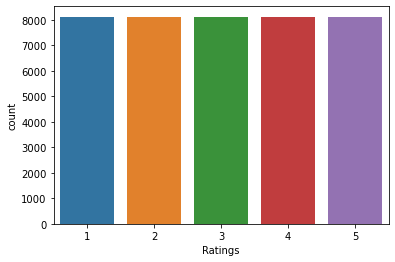

In [79]:
# Visualizing the data after oversampling
sns.countplot(y_train1)

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [81]:
lg=LogisticRegression()
lg.fit(x_train1, y_train1)
lg.score(x_train1, y_train1)
pred_lg=lg.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

accuracy score:  0.8662037905798461
[[ 628   57   22    4    3]
 [  68  223   62   20    2]
 [  23   55  341   53   13]
 [  12   14   69  876   55]
 [  11   20   34  116 2548]]
              precision    recall  f1-score   support

           1       0.85      0.88      0.86       714
           2       0.60      0.59      0.60       375
           3       0.65      0.70      0.67       485
           4       0.82      0.85      0.84      1026
           5       0.97      0.93      0.95      2729

    accuracy                           0.87      5329
   macro avg       0.78      0.79      0.78      5329
weighted avg       0.87      0.87      0.87      5329



# Decision Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)
dtc.score(x_train1,y_train1)
pred_dtc=dtc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy score:  0.8108463126290111
[[ 560   57   31   22   44]
 [  53  182   51   34   55]
 [  31   44  312   41   57]
 [  26   31   68  822   79]
 [  52   46   75  111 2445]]
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       714
           2       0.51      0.49      0.50       375
           3       0.58      0.64      0.61       485
           4       0.80      0.80      0.80      1026
           5       0.91      0.90      0.90      2729

    accuracy                           0.81      5329
   macro avg       0.71      0.72      0.72      5329
weighted avg       0.81      0.81      0.81      5329



# Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rfc=RandomForestClassifier()
rfc.fit(x_train1,y_train1)
rfc.score(x_train1,y_train1)
pred_rfc=rfc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

accuracy score:  0.8585100394070182
[[ 616   65   14    7   12]
 [  81  225   36   12   21]
 [  24   65  321   48   27]
 [  12   27   63  862   62]
 [   8   32   35  103 2551]]
              precision    recall  f1-score   support

           1       0.83      0.86      0.85       714
           2       0.54      0.60      0.57       375
           3       0.68      0.66      0.67       485
           4       0.84      0.84      0.84      1026
           5       0.95      0.93      0.94      2729

    accuracy                           0.86      5329
   macro avg       0.77      0.78      0.77      5329
weighted avg       0.86      0.86      0.86      5329



# Extra Trees Classifier

In [86]:
from sklearn.ensemble import ExtraTreesClassifier

In [87]:
etc=ExtraTreesClassifier()
etc.fit(x_train1,y_train1)
etc.score(x_train1,y_train1)

pred_etc=etc.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred_etc))
print(confusion_matrix(y_test,pred_etc))
print(classification_report(y_test,pred_etc))

accuracy score:  0.863013698630137
[[ 619   63   19    5    8]
 [  79  222   39   15   20]
 [  23   62  327   49   24]
 [  10   29   63  856   68]
 [   6   30   35   83 2575]]
              precision    recall  f1-score   support

           1       0.84      0.87      0.85       714
           2       0.55      0.59      0.57       375
           3       0.68      0.67      0.68       485
           4       0.85      0.83      0.84      1026
           5       0.96      0.94      0.95      2729

    accuracy                           0.86      5329
   macro avg       0.77      0.78      0.78      5329
weighted avg       0.87      0.86      0.86      5329



# SVC

In [88]:
from sklearn.svm import SVC

In [89]:
svc = SVC()
svc.fit(x_train1, y_train1)
svc.score(x_train1, y_train1)
svc_pred = svc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

accuracy score:  0.8744604991555639
[[ 644   39   14    7   10]
 [  92  190   52   18   23]
 [  24   36  332   47   46]
 [   9   10   56  869   82]
 [   7   12   17   68 2625]]
              precision    recall  f1-score   support

           1       0.83      0.90      0.86       714
           2       0.66      0.51      0.57       375
           3       0.70      0.68      0.69       485
           4       0.86      0.85      0.85      1026
           5       0.94      0.96      0.95      2729

    accuracy                           0.87      5329
   macro avg       0.80      0.78      0.79      5329
weighted avg       0.87      0.87      0.87      5329



From the above classification models, the highest accuracy score belongs to the SVC Model. Followed by the Logistic Regression Model. 

Next the Extra Trees Classifier model & Random Forest Classifier model.

Lastly, the Decision Tree Classifier model has the lowest accuracy score among the other models.

# Cross Validation Score

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
scr_lg=cross_val_score(lg,train_features,y,cv=5)
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.8026432631662027


In [92]:
scr_dtc=cross_val_score(dtc,train_features,y,cv=5)
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.7240076755309317


In [93]:
scr_rfc=cross_val_score(rfc,train_features,y,cv=5)
print("Cross validation score of this model is: ",scr_rfc.mean())

Cross validation score of this model is:  0.7861750179124709


In [94]:
scr_etc=cross_val_score(etc,train_features,y,cv=5)
print("Cross validation score of this model is: ",scr_etc.mean())

Cross validation score of this model is:  0.7887555255115525


In [95]:
scr_svc=cross_val_score(svc,train_features,y,cv=5)
print("Cross validation score of this model is: ",scr_svc.mean())

Cross validation score of this model is:  0.8021264131148017


From the above Cross Validation Scores, the highest score belongs to Logistic Regression Model. Followed by the SVC Model.

Next the Extra Trees Classifier model & Random Forest Classifier model.

Lastly, the Decision Tree Classifier model.

# Hyper Parameter Tuning

Since the Accuracy Score and the Crosss Validation Score of the Logistic Regression Model have the least different between them, we shalll consider it for hyper parameter tuning.

We shall use GridSearchCV for hyper parameter tuning.

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
parameters={
    'C': [0.5,1.0],
    'penalty': ['l1', 'l2'],
    'solver':['newton-cg','lbfgs']}
grid_lg = GridSearchCV(lg, param_grid = parameters, cv = 4)

In [98]:
grid_lg.fit(x_train1, y_train1)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1.0], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs']})

In [99]:
grid_lg.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [100]:
Final_Model= LogisticRegression(C=0.1,penalty='l2',solver='newton-cg')

Final_Model.fit(x_train1,y_train1)
pred = Final_Model.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:  0.8316757365359354
[[ 596   93   19    3    3]
 [  54  249   51   18    3]
 [  20   78  336   41   10]
 [  16   36  105  812   57]
 [  13   45   59  173 2439]]
              precision    recall  f1-score   support

           1       0.85      0.83      0.84       714
           2       0.50      0.66      0.57       375
           3       0.59      0.69      0.64       485
           4       0.78      0.79      0.78      1026
           5       0.97      0.89      0.93      2729

    accuracy                           0.83      5329
   macro avg       0.74      0.78      0.75      5329
weighted avg       0.85      0.83      0.84      5329



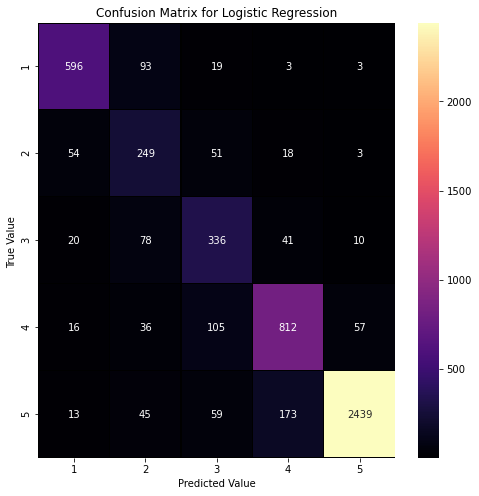

In [101]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["1","2","3","4","5"]
y_axis_labels = ["1","2","3","4","5"]

f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="magma",xticklabels = x_axis_labels,yticklabels = y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Saving the Model

Logistic Regression Model is our best model with accuracy of 83.16 %.

In [103]:
import joblib
joblib.dump(Final_Model,"Ratings_Prediction_Project.pkl")

['Ratings_Prediction_Project.pkl']

# Prediction

In [104]:
# Loading the saved model
ratings_prediction_model=joblib.load("Ratings_Prediction_Project.pkl")

# Prediction
prediction = ratings_prediction_model.predict(x_test)
prediction

array([4, 1, 1, ..., 5, 5, 4])

In [105]:
pd.DataFrame([ratings_prediction_model.predict(x_test)[:],y_test[:]],index=["Predicted Rating","Actual Rating"])

,0,1,2,3,4,5,6,7,8,9,...,5319,5320,5321,5322,5323,5324,5325,5326,5327,5328
Predicted Rating,4,1,1,5,2,1,5,4,1,1,...,5,5,4,3,5,4,1,5,5,4
Actual Rating,5,1,1,5,1,4,5,4,1,1,...,5,5,4,3,5,5,1,5,5,4


The actual and predicted values are almost similar.